/var/folders/lk/g6tp_z_d4vd9qk_j7tqfsc6h0000gn/T/ipykernel_93709/723665794.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['year'] = pd.to_datetime(data['year'], format='%Y')


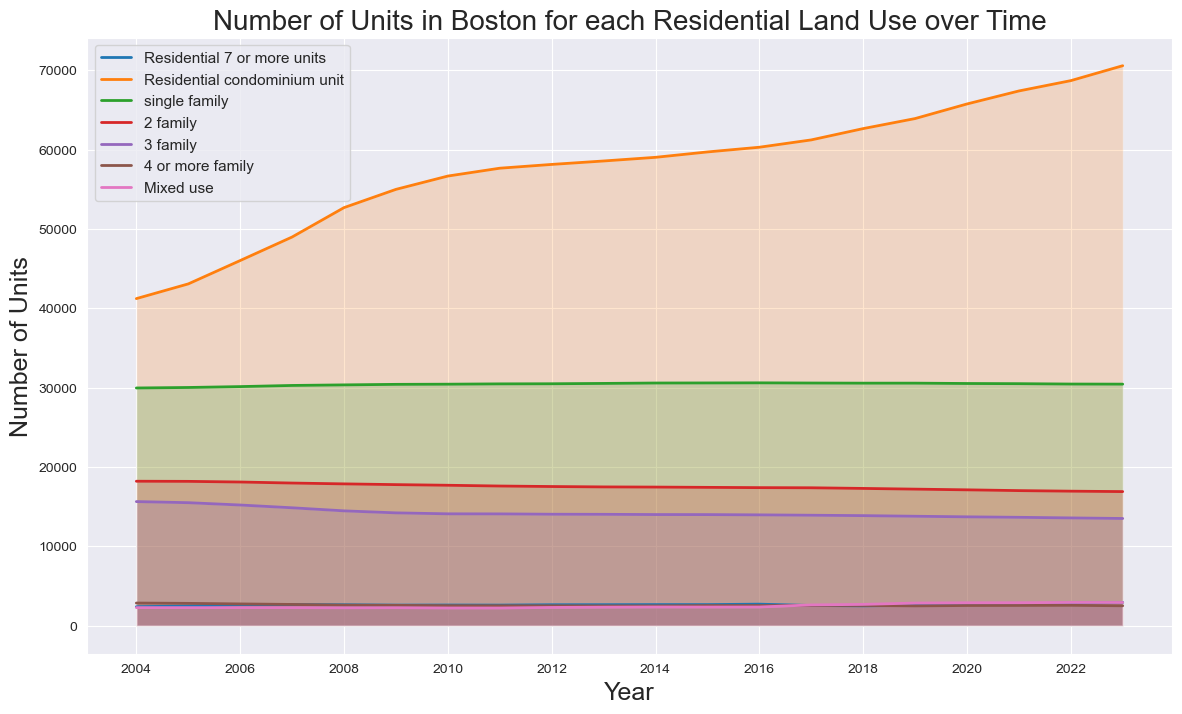

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3


cnx = sqlite3.connect("BostonHousing-allyears.db")

# Define the SQL query
query = """
SELECT year, lu, COUNT(pid) as NumberOfBuildings
FROM assessments
GROUP BY year, lu;
"""

df = pd.read_sql_query(query, cnx)

cnx.close()

# Filter out non-residential land use values
data = df[df['lu'].isin(['R1', 'R2', 'R3', 'R4', 'CD', 'A', 'RC'])]

data['year'] = pd.to_datetime(data['year'], format='%Y')

# Pivot the data so that 'lu' values become new columns, with 'NumberOfBuildings' as values
pivoted = data.pivot(index='year', columns='lu', values='NumberOfBuildings')

pivoted = pivoted.rename(columns={
    'R1' : 'single family',
    'R2' : '2 family',
    'R3' : '3 family',
    'R4' : '4 or more family',
    'CD' : 'Residential condominium unit',
    'A' : 'Residential 7 or more units',
    'RC' : 'Mixed use'
})

# Fill NaN values with 0, if any (there shouldn't be any)
pivoted = pivoted.fillna(0)

sns.set_style("darkgrid")



# Plot data
plt.figure(figsize=(14,8))
for column in pivoted.columns:
    plt.plot(pivoted.index, pivoted[column], linewidth=2, label=column)
    plt.fill_between(pivoted.index, pivoted[column], alpha=0.2)  # Fill area under each line


plt.legend(loc='upper left', fontsize=11)
plt.title('Number of Units in Boston for each Residential Land Use over Time', size=20)
plt.xlabel('Year', size=18)
plt.ylabel('Number of Units', size=18)
plt.show()






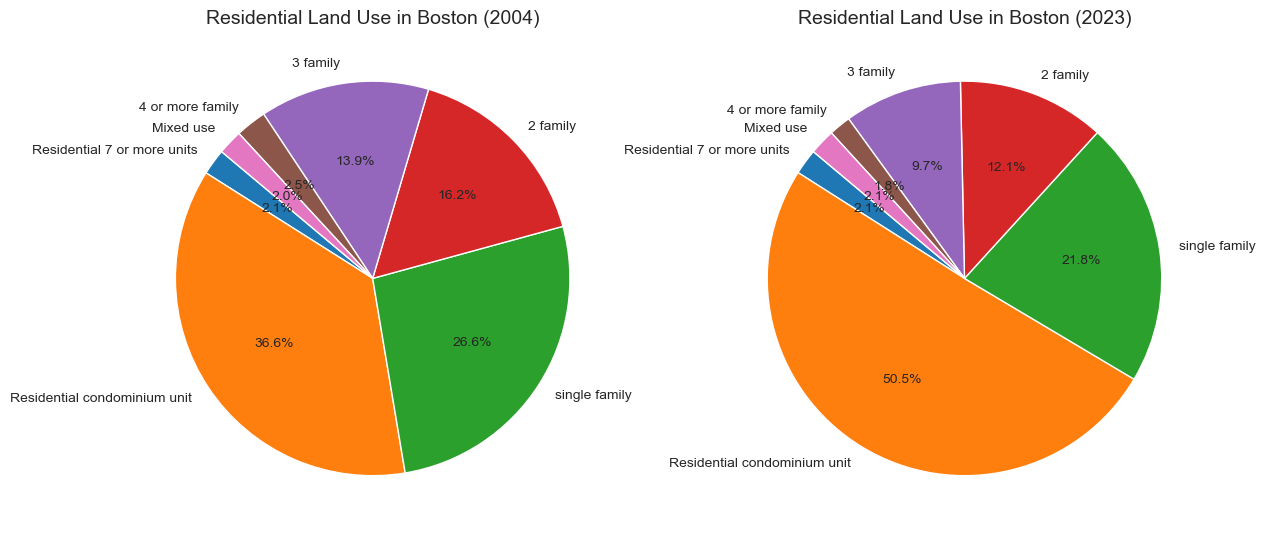

Timestamp('2004-01-01 00:00:00')

In [71]:
# Extract data for the first and last year
data_first_year = pivoted.loc['2004-01-01 00:00:00']
data_last_year = pivoted.loc['2023-01-01 00:00:00']

# Remove categories with zero buildings for both years
data_first_year = data_first_year[data_first_year > 0]
data_last_year = data_last_year[data_last_year > 0]

# Create subplots
fig, axs = plt.subplots(1, 2, figsize=(14, 7))

# Pie chart for the first year
axs[0].pie(data_first_year, labels=data_first_year.index, autopct='%1.1f%%', startangle=140)
axs[0].set_title(f'Residential Land Use in Boston (2004)', size=14)

# Pie chart for the last year
axs[1].pie(data_last_year, labels=data_last_year.index, autopct='%1.1f%%', startangle=140)
axs[1].set_title(f'Residential Land Use in Boston (2023)', size=14)

# Display the plot
plt.show()

first_year
